# Tasks
- [x] What does the dataset contain?
- [x] Videos:
	- [x] How many videos are there?
	- [x] How long are the videos? 
	- [x] What are some summary statistics of the videos?
		- [x] Average number of number of frames
		- [x] Distribution of number of frames
- [ ] Annotations:
	- [x] How many object types are there?
	- [x] How many objects are shown per video?
	- [x] Total number of  people objects are shown per video?
	- [x] Distribution of people objects in each video
	- [x] Total number of frames that contain people objects per video and combined
	- [ ] Average size of people objects (calculate area of pixels)
	- [ ] Unique people objects shown per video? Overall?

In [15]:
import cv2 as cv
import pandas as pd
import os
from utils import *
import numpy as np
import matplotlib.pyplot as plt
_,annotations_dir,videos_dir = get_dirs()

# Videos

In [16]:
videos_list = []
for i, video in enumerate(os.listdir(videos_dir)):
    video_path = (videos_dir+video)
    capture = cv.VideoCapture(video_path)
    total_frame_count = int(capture.get(cv.CAP_PROP_FRAME_COUNT))
    videos_list.append([video, total_frame_count])

In [3]:
videos_df = pd.DataFrame.from_records(videos_list, columns=['video_name', 'frame_count'])
videos_df.head()

,video_name,frame_count
0,VIRAT_S_000001.mp4,20655
1,VIRAT_S_000002.mp4,9075
2,VIRAT_S_000003.mp4,20940
3,VIRAT_S_000004.mp4,17640
4,VIRAT_S_000006.mp4,17805


In [4]:
## Summary statistics
videos_df.describe()

,frame_count
count,329.000000
mean,2653.258359
std,3788.204434
min,318.000000
25%,834.000000
50%,1607.000000
75%,2691.000000
max,29580.000000


In [5]:
# Total number of frames (combined)
total_frames = videos_df['frame_count'].sum()
print(total_frames)

872922


<AxesSubplot:xlabel='video_name'>

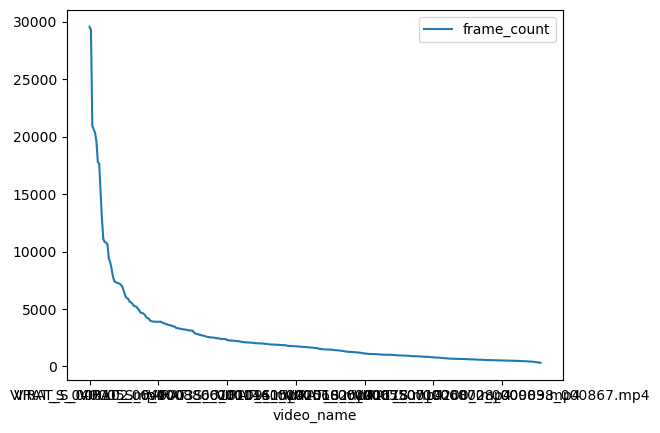

In [6]:
# Distribution of total number of frames per video (sorted)
videos_df.sort_values(by='frame_count', ascending=False).plot(x='video_name', y='frame_count', kind='line')

# Annotations

In [7]:
# Create empty dataframe with appropriate columns
objects_df = pd.DataFrame(data=None, columns=["video_name","object_id","object_duration","current_frame","bbox_lefttop_x","bbox_lefttop_y","bbox_width","bbox_height","object_type"], dtype="int64")
objects_df.head()

,video_name,object_id,object_duration,current_frame,bbox_lefttop_x,bbox_lefttop_y,bbox_width,bbox_height,object_type


In [8]:
# Find all objects.txt files for all videos
# Iterate through each person object file and append to existing dataframe

video_list = videos_df.copy()
video_list = video_list['video_name'].str.replace('.mp4', '', regex=True)

for current_video in video_list:
    try:
        temp_df = virat_txt_to_df(annotations_dir, current_video, table_category='objects')
    except:
        print('Exception occured at ',current_video)
    temp_df['video_name'] = current_video
    temp_df = temp_df[temp_df['object_type'] == 1]
    objects_df = pd.concat([objects_df, temp_df])

Exception occured at  VIRAT_S_000200_02_000479_000635
Exception occured at  VIRAT_S_000200_05_001525_001575
Exception occured at  VIRAT_S_000201_04_000682_000822
Exception occured at  VIRAT_S_000203_05_001122_001159
Exception occured at  VIRAT_S_000203_09_001789_001842
Exception occured at  VIRAT_S_000205_03_000860_000922
Exception occured at  VIRAT_S_000205_05_001092_001124
Exception occured at  VIRAT_S_000206_09_001714_001851
Exception occured at  VIRAT_S_000207_05_001125_001193
Exception occured at  VIRAT_S_050201_02_000395_000483
Exception occured at  VIRAT_S_050201_03_000573_000647
Exception occured at  VIRAT_S_050201_05_000890_000944
Exception occured at  VIRAT_S_050201_06_001168_001240
Exception occured at  VIRAT_S_050201_07_001348_001458
Exception occured at  VIRAT_S_050201_09_001821_001876
Exception occured at  VIRAT_S_050202_05_000857_000912
Exception occured at  VIRAT_S_050203_07_001288_001531
Exception occured at  VIRAT_S_050203_09_001960_002083


In [9]:
objects_df = objects_df.reset_index()
objects_df = objects_df.drop(columns='index')

In [10]:
objects_df.head()

,video_name,object_id,object_duration,current_frame,bbox_lefttop_x,bbox_lefttop_y,bbox_width,bbox_height,object_type
0,VIRAT_S_000001,1,385,3455,1.0,663.0,76.0,132.0,1.0
1,VIRAT_S_000001,1,385,3456,1.0,663.0,76.0,132.0,1.0
2,VIRAT_S_000001,1,385,3457,1.0,663.0,76.0,132.0,1.0
3,VIRAT_S_000001,1,385,3458,1.0,663.0,76.0,132.0,1.0
4,VIRAT_S_000001,1,385,3459,1.0,663.0,76.0,132.0,1.0


## Objects Analysis

video_name
VIRAT_S_000102                     76
VIRAT_S_050300_06_001427_001616    61
VIRAT_S_010001_02_000195_000498    61
VIRAT_S_010201_03_000270_000359    54
VIRAT_S_010204_01_000072_000225    54
                                   ..
VIRAT_S_050201_04_000669_000728     1
VIRAT_S_050201_06_001168_001240     1
VIRAT_S_050201_07_001348_001458     1
VIRAT_S_050201_08_001567_001647     1
VIRAT_S_000207_04_000902_000934     1
Name: object_id, Length: 325, dtype: int64


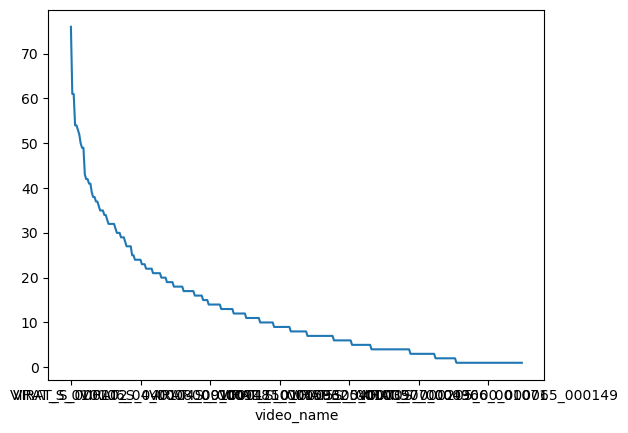

In [11]:
# How many unique people are shown per video?
unique_obj = objects_df.groupby(['video_name'])['object_id'].agg(lambda x:len(x.unique()))
unique_obj.sort_values(ascending=False).plot()
print(unique_obj.sort_values(ascending=False))

In [13]:
# Distribution of people objects in each video
selected_video = "VIRAT_S_010005_08_000647_000693"
selected_video_df = videos_df[videos_df['video_name'].str.contains(selected_video)]
selected_video_len = selected_video_df.frame_count.values[0]
selected_video_anno = objects_df[objects_df['video_name'] == selected_video].sort_values('current_frame')
number_obj_per_frame = selected_video_anno.groupby('current_frame')['current_frame'].count()

<AxesSubplot:xlabel='current_frame'>

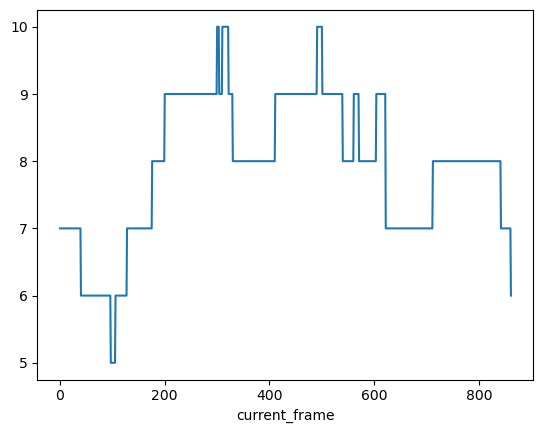

In [14]:
number_obj_per_frame.plot(kind='line')

In [16]:
# Average size of people objects (calculate area of pixels)


In [17]:
# Unique people objects shown per video? Overall?
